In [ ]:
#Link do Dataset:https://www.kaggle.com/shrutimechlearn/churn-modelling

# Importando as bibliotecas

In [ ]:
#Bibliotecas para análise de dados
import pandas as pd
import numpy as np
# Bibliotecas para ML
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, plot_roc_curve
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
#biblioteca para tratamento de classes desbalanceadas
from imblearn.over_sampling import RandomOverSampler
#Bibliotecas para gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Importando os dados

In [ ]:
df = pd.read_csv('Churn.csv')

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Análise preliminar dos dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [ ]:
df.select_dtypes(object)

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


In [ ]:
df=df.drop('RowNumber',axis=1)

In [ ]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df=df.drop('Surname',axis=1)

In [ ]:
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Baseline

In [ ]:
#Tratamento de dados para baseline
df = pd.get_dummies(df, columns=['Geography','Gender'],drop_first=True)

In [ ]:
df

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
#Divisão entre X e y
y=df['Exited']
X=df.drop(columns=['CustomerId','Exited'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [ ]:
lgbm = LGBMClassifier(max_depth=3, 
                      n_estimators=60, 
                      colsample_bytree=.7, 
                      n_jobs=-1)

In [ ]:
lgbm.fit(X_train,y_train)

LGBMClassifier(colsample_bytree=0.7, max_depth=3, n_estimators=60)

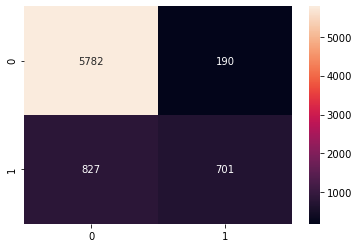

In [ ]:
sns.heatmap(confusion_matrix(y_train,lgbm.predict(X_train)),annot=True,fmt="d");

In [ ]:
lgbm.score(X_train,y_train)

0.8685333333333334

In [ ]:
y_pred=lgbm.predict(X_train)

In [ ]:
precision_score(y_train,lgbm.predict(X_train))

0.8072562358276644

In [ ]:
recall_score(y_train,lgbm.predict(X_train))


0.46596858638743455

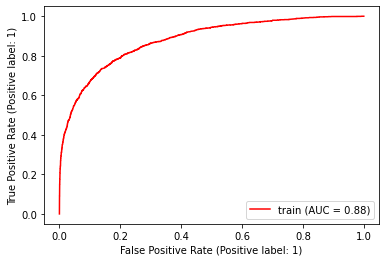

In [ ]:
fig, ax = plt.subplots()

plot_roc_curve(lgbm, X_train, y_train, color='red', ax= ax, name='train')

Há indício de desbaçanceamento de dados.

## Métricas com os dados de teste

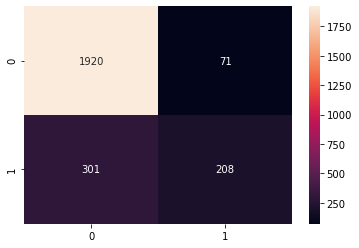

In [ ]:
sns.heatmap(confusion_matrix(y_test,lgbm.predict(X_test)),annot=True,fmt="d");

In [ ]:
lgbm.score(X_test,y_test)

0.8512

In [ ]:
y_pred_test=lgbm.predict(X_test)

In [ ]:
precision_score(y_test,lgbm.predict(X_test))

0.7455197132616488

In [ ]:
recall_score(y_test,lgbm.predict(X_test))

0.4086444007858546

As métricas estão parecidas, entre dados de treino e test, o que indica que não houve overfitting nem underfitting.

# Análise dos dados

<AxesSubplot:xlabel='count', ylabel='Exited'>

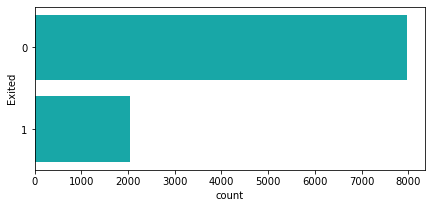

In [ ]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="Exited", data=df, color="c")

In [ ]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [ ]:
y_resampled.value_counts()

1    5972
0    5972
Name: Exited, dtype: int64

# Modelo com dados rebalanceados

In [ ]:
lgbm_1= LGBMClassifier(max_depth=3, 
                       n_estimators=60, 
                       colsample_bytree=.7, 
                       n_jobs=-1)

In [ ]:
lgbm_1.fit(X_resampled,y_resampled)

LGBMClassifier(colsample_bytree=0.7, max_depth=3, n_estimators=60)

In [ ]:
lgbm_1.score(X_resampled,y_resampled)

0.8050066979236437

In [ ]:
precision_score(y_resampled,lgbm_1.predict(X_resampled))

0.8178328389460827

In [ ]:
recall_score(y_resampled,lgbm_1.predict(X_resampled))

0.7848292029470864

Houve perda de Score, com ganhos em precision_score e recall_score. Isso significa que o modelo agora erra mais, mas detecta mais os casos de churn.

## Métricas com dados de teste

In [ ]:
lgbm_1.score(X_test,y_test)

0.7928

In [ ]:
y_pred_test_1=lgbm_1.predict(X_test)

In [ ]:
precision_score(y_test,lgbm_1.predict(X_test))

0.4939434724091521

In [ ]:
recall_score(y_test,lgbm_1.predict(X_test))

0.7210216110019646

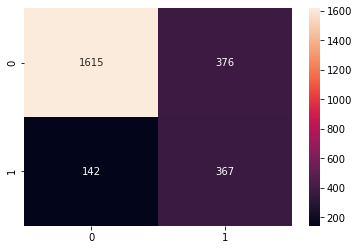

In [ ]:
sns.heatmap(confusion_matrix(y_test,lgbm_1.predict(X_test)),annot=True,fmt="d");

Com os dados de teste, o modelo com dados rebalanceados, ganhou em recall_score enquanto perdeu em score e precision_score

# Modelo com mudança de parâmetros

In [ ]:
clf_tuned = LGBMClassifier(boosting_type="rf",
                         num_leaves=80,
                         colsample_bytree=.5,
                         n_estimators=200,
                         min_child_weight=5,
                         min_child_samples=8,
                         subsample=.632,
                         subsample_freq=1,
                         min_split_gain=0,
                         reg_alpha=0,
                         boosting='gbdt',
                         n_jobs=-1)

In [ ]:
clf_tuned.fit(X_resampled,y_resampled)

LGBMClassifier(boosting='gbdt', boosting_type='rf', colsample_bytree=0.5,
               min_child_samples=8, min_child_weight=5, min_split_gain=0,
               n_estimators=200, num_leaves=80, reg_alpha=0, subsample=0.632,
               subsample_freq=1)

In [ ]:
clf_tuned.score(X_resampled,y_resampled)

0.992213663764233

In [ ]:
precision_score(y_resampled,clf_tuned.predict(X_resampled))

0.9875601260573893

In [ ]:
recall_score(y_resampled,clf_tuned.predict(X_resampled))

0.9969859343603483

Com a mudança de hiperparâmetros, houve significativa melhora das métricas, com os dados rebalanceados.

## Métricas para os dados de teste

In [ ]:
clf_tuned.score(X_test,y_test)

0.9548

In [ ]:
precision_score(y_test,clf_tuned.predict(X_test))

0.8680297397769516

In [ ]:
recall_score(y_test,clf_tuned.predict(X_test))

0.9174852652259332

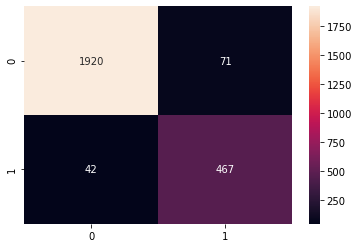

In [ ]:
sns.heatmap(confusion_matrix(y_test,clf_tuned.predict(X_test)),annot=True,fmt="d");

Significativa redução da quantidade de falsos positivos e negativos.

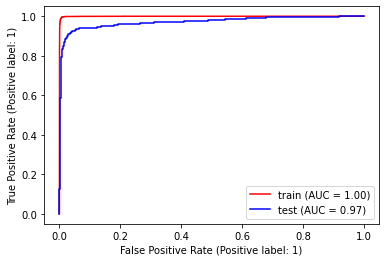

In [ ]:
fig, ax = plt.subplots()

plot_roc_curve(clf_tuned, X_resampled,y_resampled, color='red', ax= ax, name='train')
plot_roc_curve(clf_tuned, X_test, y_test, color='blue', ax=ax, name='test')

Há uma hipótese de overfitting. Entretanto, o modelo foi capaz de generalizar bem para os dados de teste e além disso foi verificado a hipótese de data leakage, que não se confirmou.

Conforme a curva acima, não houve diferença de desempenho ao tratar os dados de teste e treino, o que indica que não houve overfitting nem underfitting, ou seja, o modelo foi capaz de generalizar.

O modelo de baseline teve um melhor precision_score que o modelo com oversample e com alteração dos hiperparâmetros, embora tenha pior recall_score e score. Por isso, para escolher o modelo corretamente, deve ser levado em consideração qual a intervenção que será adotada para os clientes que estão previstos como churn, e também levar em consideração a receita com esses clientes.

# Análise do modelo

In [ ]:
#feature importance
sorted_idx = np.argsort(clf_tuned.feature_importances_)[::-1]
for index in sorted_idx:
    print([X_resampled.columns[index], clf_tuned.feature_importances_[index]])

['EstimatedSalary', 3506]
['CreditScore', 3475]
['Balance', 2757]
['Age', 2255]
['Tenure', 1508]
['Gender_Male', 486]
['NumOfProducts', 387]
['HasCrCard', 335]
['IsActiveMember', 318]
['Geography_Germany', 290]
['Geography_Spain', 286]


Com a feature importance do modelo é possível procurar e propor intervenções. Para isso dividiremos o dataset original em dois subdatasets, o df_0 para os clientes que não saíram e o df_1 para os clientes que saíram da instituíção.

In [ ]:
data = pd.read_csv('Churn.csv')

In [ ]:
df_0=data[data['Exited']==0]

In [ ]:
df_1=data[data['Exited']==1]

In [ ]:
df_0=df_0[['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard',
         'EstimatedSalary',"Exited"]]

In [ ]:
df_1=df_1[['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard',
         'EstimatedSalary',"Exited"]]

In [ ]:
df_0.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited
count,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.0
mean,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,99738.391772,0.0
std,95.653837,10.125363,2.880658,62848.040701,0.509536,0.455101,57405.586966,0.0
min,405.000000,18.000000,0.000000,0.000000,1.000000,0.000000,90.070000,0.0
25%,585.000000,31.000000,3.000000,0.000000,1.000000,0.000000,50783.490000,0.0
50%,653.000000,36.000000,5.000000,92072.680000,2.000000,1.000000,99645.040000,0.0
75%,718.000000,41.000000,7.000000,126410.280000,2.000000,1.000000,148609.955000,0.0
max,850.000000,92.000000,10.000000,221532.800000,3.000000,1.000000,199992.480000,0.0


In [ ]:
df_1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited
count,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.0
mean,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,101465.677531,1.0
std,100.321503,9.761562,2.936106,58360.794816,0.801521,0.458776,57912.418071,0.0
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,11.580000,1.0
25%,578.000000,38.000000,2.000000,38340.020000,1.000000,0.000000,51907.720000,1.0
50%,646.000000,45.000000,5.000000,109349.290000,1.000000,1.000000,102460.840000,1.0
75%,716.000000,51.000000,8.000000,131433.330000,2.000000,1.000000,152422.910000,1.0
max,850.000000,84.000000,10.000000,250898.090000,4.000000,1.000000,199808.100000,1.0


Analisando as duas tabelas acima, considerando a mediana, podemos observar que as maiores foram 
encontradas nas colunas de Age(Idade do cliente),Balance(que é o balanço do cliente com o banco). Deve ser estudado novos produtos para que aumente a retenção retenção de clientes com maior idade e balanço.
É necessário uma análise das variáveis categóricas.

## Análise de churn por país

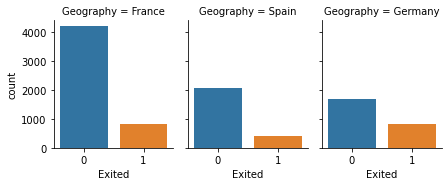

In [ ]:
sns.catplot(x="Exited", col="Geography", col_wrap=4,
                data=data,
                kind="count", height=2.5, aspect=.8)

In [ ]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

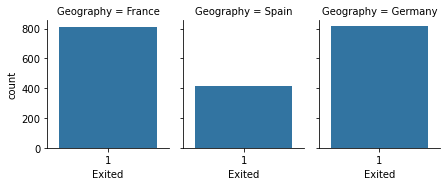

In [ ]:
sns.catplot(x="Exited", col="Geography", col_wrap=4,
                data=df_1,
                kind="count", height=2.5, aspect=.8)

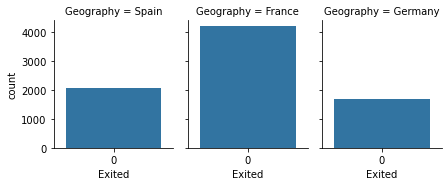

In [ ]:
sns.catplot(x="Exited", col="Geography", col_wrap=4,
                data=df_0,
                kind="count", height=2.5, aspect=.8)

In [ ]:
data.groupby('Geography').count()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,,,,,
France,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014
Germany,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509
Spain,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477


In [ ]:
data.groupby('Geography').mean()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,,,
France,5025.228560,1.569065e+07,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,5000.278996,1.569056e+07,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,4950.667743,1.569192e+07,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


Na Alemanha há uma discrepância, se comparado aos outros países, na proporção número de clientes que saíram. Se revertessemos a proporção de churn da Alemanha para a média dos outros países, que é de menos de 17%, teríamos mais 370 clientes que permaneceram. Isso reduziria de 20% para 17% a proporção de Churn. Os hábitos dos clientes da Alemanha devem ser estudados para desenvolvimento de um produto. Deve ser investigado se há algum concorrente ou alguma condição de regulação, ou mesmo de hábito, que faça com que a retenção seja menor na Alemanha.

## Análise por sexo

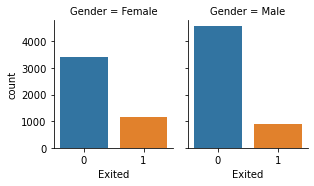

In [ ]:
sns.catplot(x="Exited", col="Gender", col_wrap=4,
                data=data,
                kind="count", height=2.5, aspect=.8)

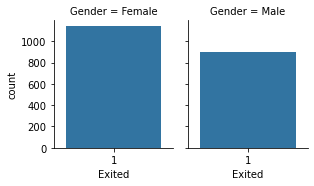

In [ ]:
sns.catplot(x="Exited", col="Gender", col_wrap=4,
                data=df_1,
                kind="count", height=2.5, aspect=.8)

In [ ]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
data.groupby('Gender').mean()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,,,
Female,4942.929562,1.569115e+07,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,5048.427891,1.569077e+07,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


Como pode ser visto acima, o Churn para clientes do sexo feminino está por volta de 25%, enquanto que no sexo masculino, 16%. A redução do Churn dos clientes do sexo feminino a 16% significaria mais de 400 clientes para a base de clientes. Deves ser estudados os hábitos de consumo dos clientes do sexo feminino para desenvolver um novo produto, ou adaptar um produto já existente para ter uam retenção maior.

# Criação do Dataframe com as probabilidades

In [ ]:
#Aplicação do modelo a todo o DataFrame
prob = clf_tuned.predict_proba(X)

In [ ]:
prob_dataframe = pd.DataFrame(prob)  

In [ ]:
prob_dataframe.drop(0, axis=1, inplace=True)

In [ ]:
prob_dataframe

,1
0,0.920481
1,0.146354
2,0.992152
3,0.046087
4,0.016562
...,...
9995,0.003371
9996,0.046716
9997,0.865536
9998,0.438540


In [ ]:
prob_dataframe = prob_dataframe.rename(columns={1:"PROB"})

In [ ]:
prob_dataframe

,PROB
0,0.920481
1,0.146354
2,0.992152
3,0.046087
4,0.016562
...,...
9995,0.003371
9996,0.046716
9997,0.865536
9998,0.438540


In [ ]:
# Criação da coluna com a probabilidade
data["PROB"] = prob_dataframe["PROB"]

In [ ]:
# Dataframe com a coluna de probabilidade
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,PROB
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.920481
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.146354
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.992152
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.046087
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0.016562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0.003371
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0.046716
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0.865536
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0.438540
